In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep()
data_loader.create_images(width=80, height=64)
selected_pix = data_loader.selected_pix
images = data_loader.get_images()
dfbio = data_loader.dfbio

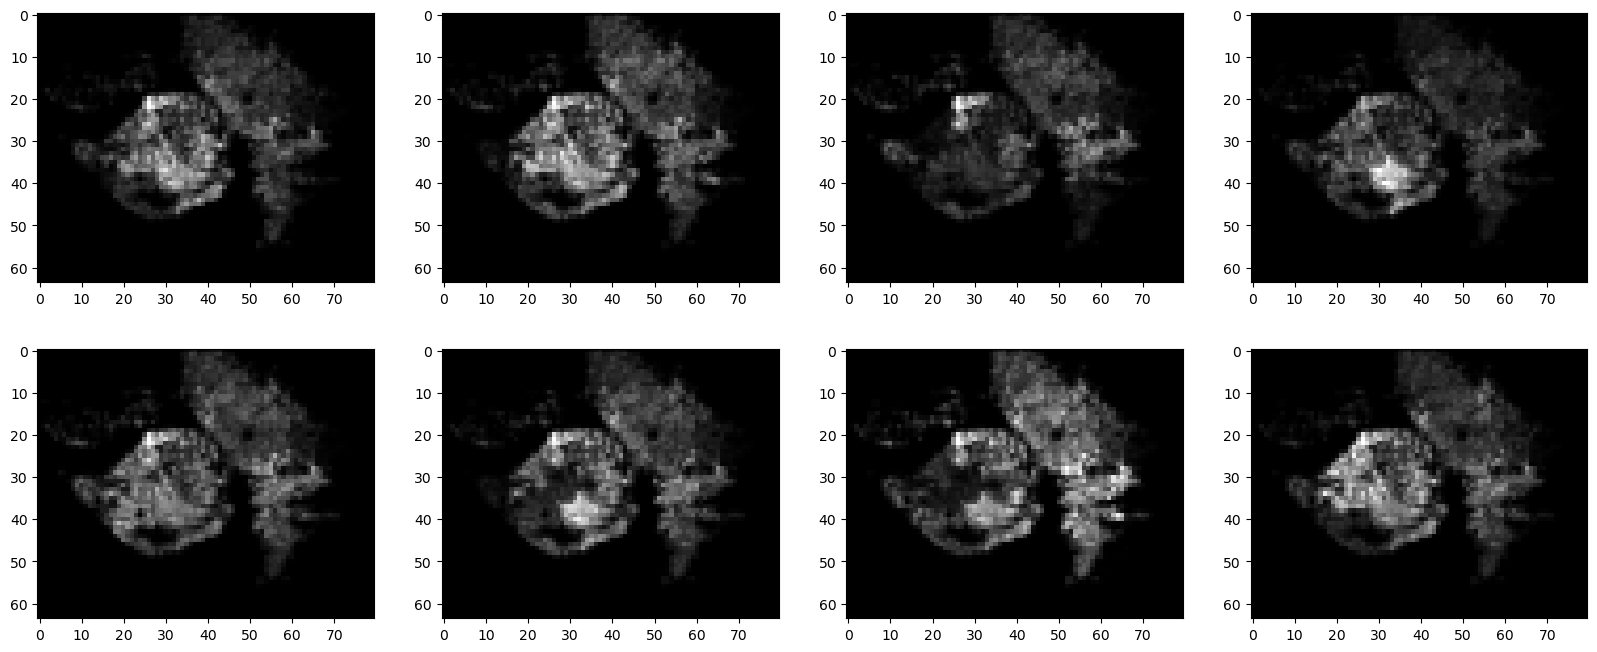

In [3]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for i,image in enumerate(images):
    axes.flatten()[i].imshow(image, cmap='gray')

In [4]:
model = get_model.ConvLSTM_3(dfbio,images)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)
# preds_image, preds_list = model.predict(selected_pix)

Epoch 1/300
4/4 [==============================] - 10s 1s/step - loss: 65.5649 - val_loss: 74.4849 - lr: 0.0100
Epoch 2/300
4/4 [==============================] - 4s 1s/step - loss: 63.7737 - val_loss: 73.7662 - lr: 0.0100
Epoch 3/300
4/4 [==============================] - 4s 1s/step - loss: 62.8691 - val_loss: 73.0944 - lr: 0.0100
Epoch 4/300
4/4 [==============================] - 4s 1s/step - loss: 61.8650 - val_loss: 72.0364 - lr: 0.0100
Epoch 5/300
4/4 [==============================] - 4s 1s/step - loss: 60.7452 - val_loss: 71.4348 - lr: 0.0100
Epoch 6/300
4/4 [==============================] - 4s 1s/step - loss: 59.5193 - val_loss: 70.3071 - lr: 0.0100
Epoch 7/300
4/4 [==============================] - 4s 1s/step - loss: 58.1920 - val_loss: 69.3727 - lr: 0.0100
Epoch 8/300
4/4 [==============================] - 4s 1s/step - loss: 56.7329 - val_loss: 68.9952 - lr: 0.0100
Epoch 9/300
4/4 [==============================] - 4s 1s/step - loss: 55.1430 - val_loss: 68.1136 - lr: 0.0100


50 100 200 250 : 27.428  
100 200 : 26.04

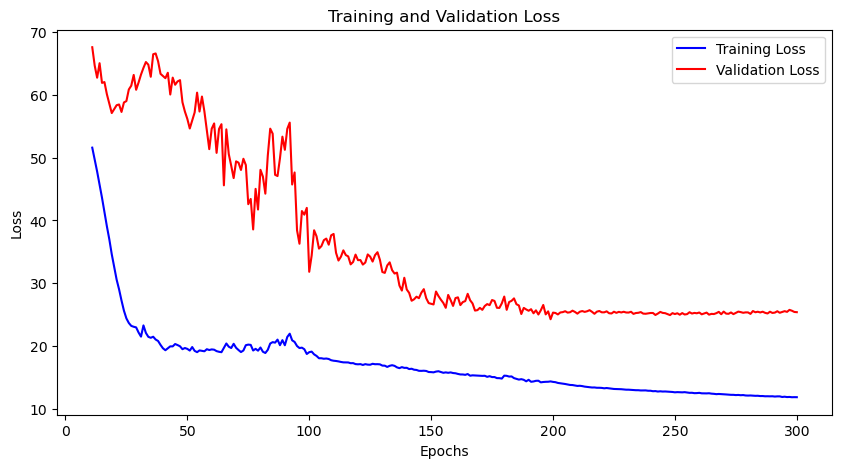

In [6]:
utils.plot_loss(history,offset=10,val=True)

In [8]:
utils.save_model(model.model, 'ConvLSTM_M_300_26.04_val')

Save Successful!


NameError: name 'preds_image' is not defined

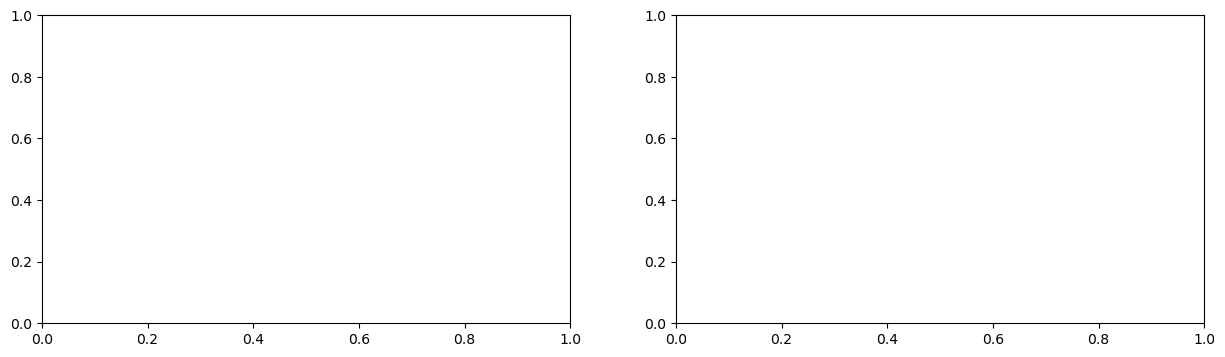

In [7]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].imshow(preds_image[0][0,:,:,0], cmap='gray')
axes[1].imshow(preds_image[1][0,:,:,0], cmap='gray')

In [ ]:
np.mean(preds_list['2018']),np.mean(preds_list['2019'])

In [ ]:
utils.real_eval(preds_list, dfreal)